***4. Preprocessing_Quality***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_nyc = pd.read_csv('nyc_with_distances.csv')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_18868\3094127854.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc = pd.read_csv('nyc_with_distances.csv')


In [4]:
print(df_nyc['review_scores_rating'].describe())
print(df_nyc['number_of_reviews'].describe())

count    17853.000000
mean        93.758976
std          7.289859
min         20.000000
25%         91.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: review_scores_rating, dtype: float64
count    17853.000000
mean        28.760432
std         38.861156
min          1.000000
25%          4.000000
50%         14.000000
75%         37.000000
max        465.000000
Name: number_of_reviews, dtype: float64


                         price  review_scores_rating  number_of_reviews
price                 1.000000              0.032804          -0.010646
review_scores_rating  0.032804              1.000000          -0.043788
number_of_reviews    -0.010646             -0.043788           1.000000


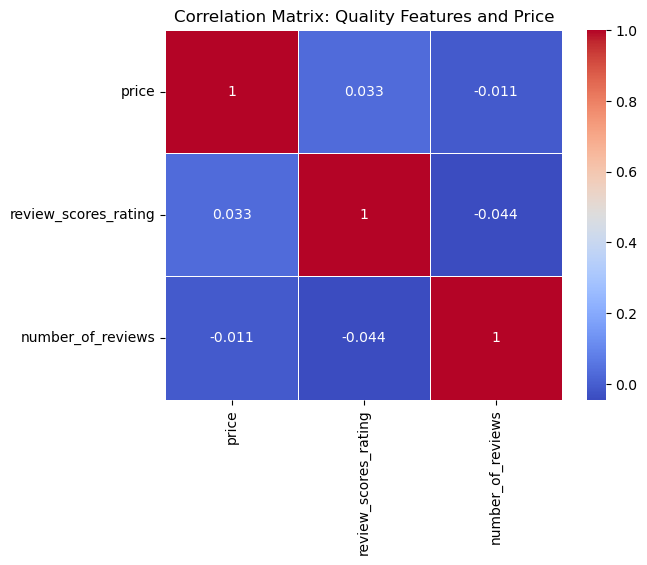

In [5]:
correlation_matrix = df_nyc[['price', 'review_scores_rating', 'number_of_reviews']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Quality Features and Price')
plt.show()

Review Scores Rating

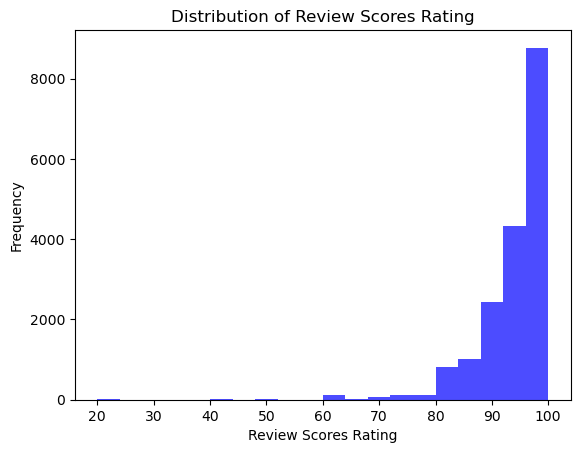

In [7]:
plt.hist(df_nyc['review_scores_rating'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\sylvi\AppData\Local\Temp\ipykernel_18868\631567302.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


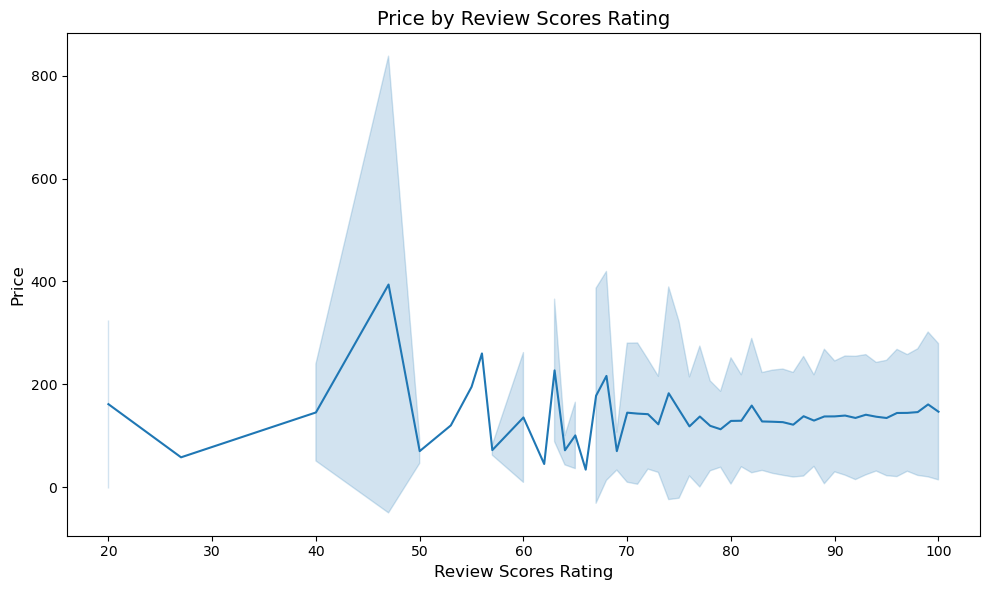

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_nyc, 
    x='review_scores_rating', 
    y='price', 
    ci='sd', 
    estimator='mean', 
)

plt.title("Price by Review Scores Rating", fontsize=14)
plt.xlabel("Review Scores Rating", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.tight_layout()
plt.show()

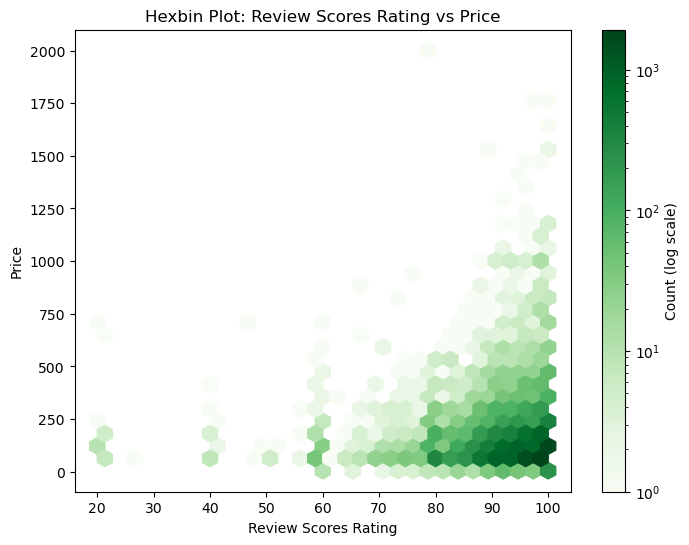

In [9]:
x = df_nyc['review_scores_rating']
y = df_nyc['price']

plt.figure(figsize=(8, 6))
plt.hexbin(x, y, gridsize=30, cmap='Greens', bins='log')
plt.colorbar(label='Count (log scale)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.title('Hexbin Plot: Review Scores Rating vs Price')
plt.show()

Number of reviews

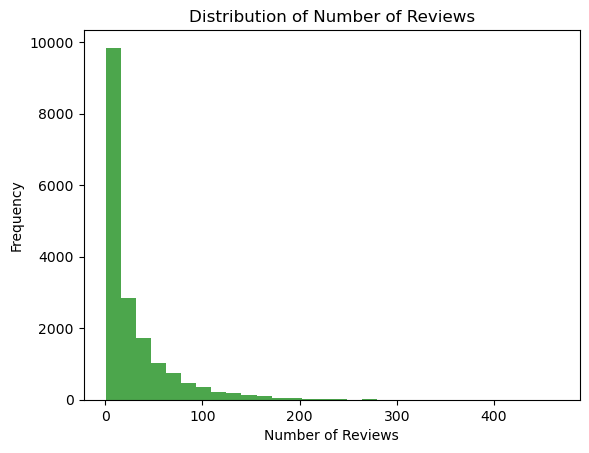

In [11]:
plt.hist(df_nyc['number_of_reviews'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

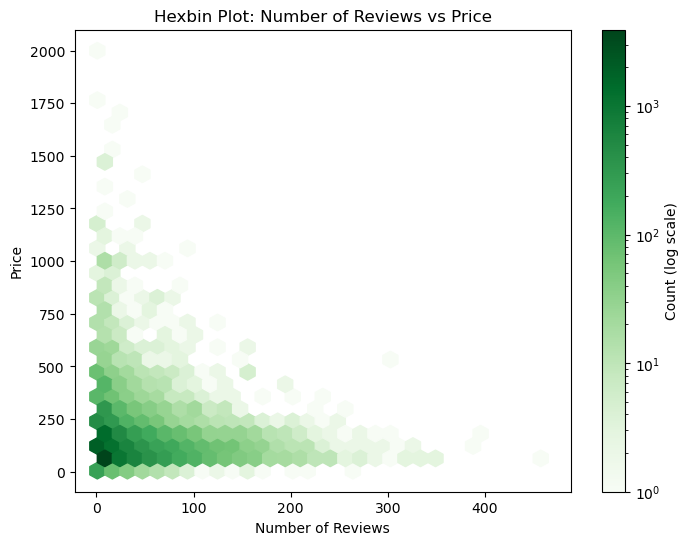

In [12]:
x = df_nyc['number_of_reviews']
y = df_nyc['price']

plt.figure(figsize=(8, 6))
plt.hexbin(x, y, gridsize=30, cmap='Greens', bins='log')
plt.colorbar(label='Count (log scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Hexbin Plot: Number of Reviews vs Price')
plt.show()

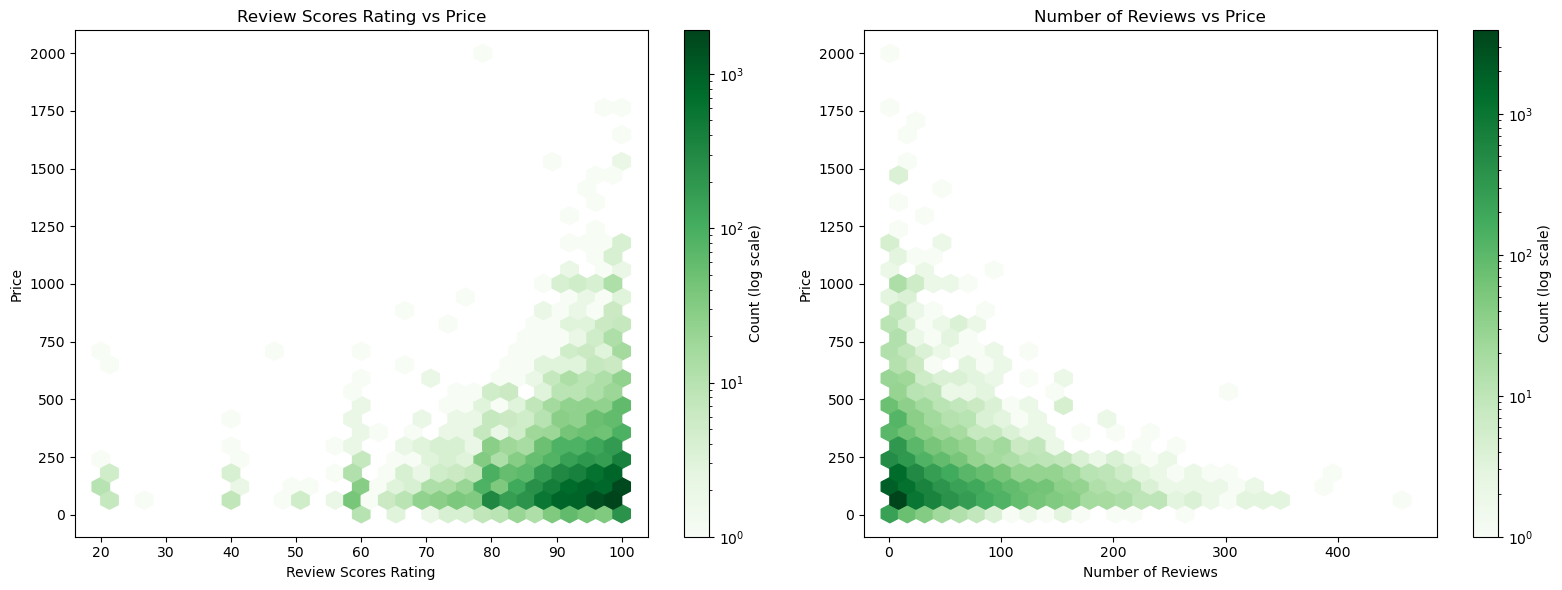

In [24]:
# Merge the plots
x1 = df_nyc['review_scores_rating']
y1 = df_nyc['price']

x2 = df_nyc['number_of_reviews']
y2 = df_nyc['price']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

hb1 = axs[0].hexbin(x1, y1, gridsize=30, cmap='Greens', bins='log')
axs[0].set_xlabel('Review Scores Rating')
axs[0].set_ylabel('Price')
axs[0].set_title('Review Scores Rating vs Price')
cb1 = fig.colorbar(hb1, ax=axs[0])
cb1.set_label('Count (log scale)')

hb2 = axs[1].hexbin(x2, y2, gridsize=30, cmap='Greens', bins='log')
axs[1].set_xlabel('Number of Reviews')
axs[1].set_ylabel('Price')
axs[1].set_title('Number of Reviews vs Price')
cb2 = fig.colorbar(hb2, ax=axs[1])
cb2.set_label('Count (log scale)')

plt.tight_layout()
plt.show()

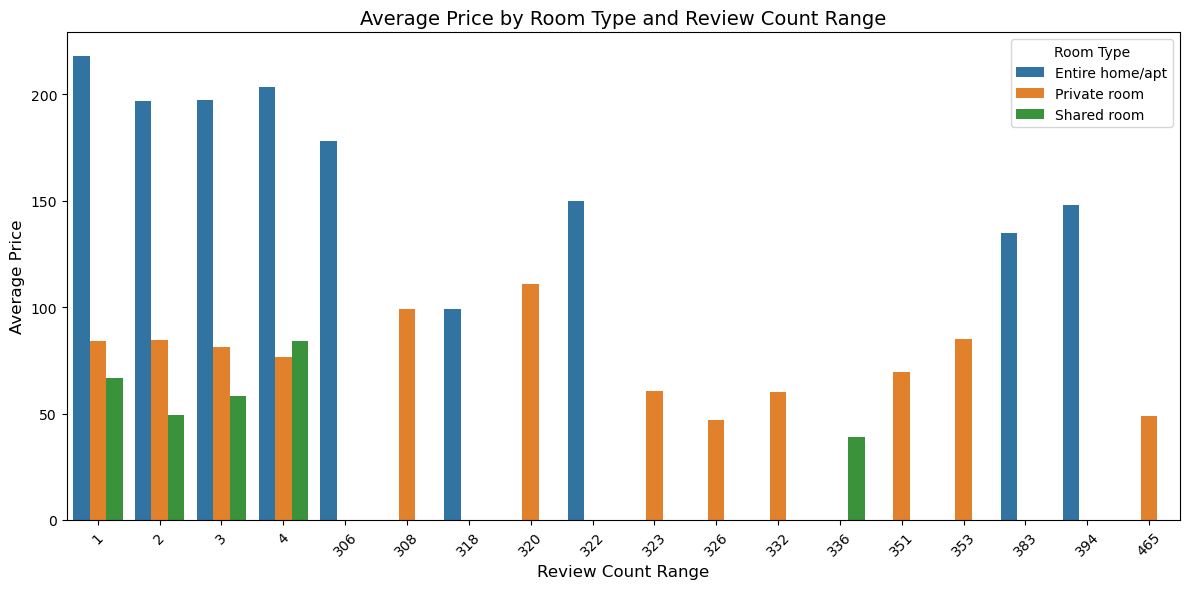

In [13]:
filtered_data = df_nyc[(df_nyc['number_of_reviews'] < 5) | (df_nyc['number_of_reviews']>300)]

grouped_data = filtered_data.groupby(['room_type', 'number_of_reviews'])['price'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='number_of_reviews', y='price', hue='room_type')
plt.title('Average Price by Room Type and Review Count Range', fontsize=14)
plt.xlabel('Review Count Range', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Room Type', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()